# Kemper et al. (2005): Humerus 3-pt bending



- Performed by: Yash Niranjan Poojary
- Reviewed by: Bengt Pipkorn and Johan Iraeus
- Last modified : 31st January 2024
- SAFER HBM Version: ![Static Badge](https://img.shields.io/badge/SAFER_HBM-11.0-1?style=flat&logoColor=blue&labelColor=whitw&color=blue)
- LSDYNA version:  `mpp d R12.1.0 `

## Experiment by Kemper et al. (2005)
### Summary:

The simulated outputs are compared to the references from PMHS tests reported by Kemper et al. <sup>[1]</sup>
1. Kemper, A.; Stitzel, J.; Duma, S; Matsuoka, F; Masuda, Mitsutoshi BIOFIDELITY OF THE SID-IIs AND A MODIFIED SID-IIs UPPER EXTREMITY: BIOMECHANICAL PROPERTIES OF THE HUMAN HUMERUS Paper Number 05-0123


![](../_env/setup_kemper_humerus_S11.png) 

## Experiment
Tests on 6 humerus, age 47-76 years, male compred the simulation results with Force-displacement curves extracted graphically 
### Information on the subjects/specimens
|     Test ID    |     Subject #    |       Sex     |     Left/Right    |     Impactor speed [mm/ms]    |     Uncut length [mm]    |
|:--------------:|:----------------:|:-------------:|:-----------------:|:-----------------------------:|:------------------------:|
|      Hum_S1    |         1        |     Female    |        Right      |              0.01             |            321           |
|      Hum_S2    |         2        |      Male     |        Left       |              0.01             |            327           |
|      Hum_S3    |         3        |      Male     |        Right      |              0.01             |            362           |
|      Hum_S4    |         4        |      Male     |        Left       |              0.01             |            350           |
|      Hum_F1    |         1        |     Female    |        Left       |                3              |            313           |
|      Hum_F2    |         2        |      Male     |        Right      |                3              |            330           |
|      Hum_F3    |         3        |      Male     |        Left       |                3              |            360           |
|      Hum_F4    |         4        |      Male     |        Right      |                3              |            355           |

### Boundary Conditions
> **Setup**
> - ***Impactor***                    : 20 mm diameter cylinder  modelled using `MAT_RIGID`                                               
> - ***Potting Cups***                    : 76.2mm x 49.22mm x 49.22mm (XYZ) `MAT_RIGID` shell with aluminum matrial properties enclosing a `MAT_ELASTIC` solids with $E=0.9Gpa$, $density=1.12 g/cm^3$ and $pr=0.3$, 200mm between their centers.
> - ***Location   of Impact***        : Mid-shaft                                                                                         
>
> **Constraints and Loading**                                                                                                    
> - ***Impact Velocity***      :        0.001 mm/ms  and 3 mm/ms                                                                                      
> - ***Impactor Constraint***            :  `*BOUNDARY_PRESCRIBED_MOTION_RIGID`
> - ***Supports Constraint***: `*CONSTRAINED_SHELL_IN_SOLID`       

### Responses recorded
- dispacement and the reaction force measured at the boudary condition

The reference values from the paper were digitalised and are incuded in the notebook. The data corresponds to the unnormalised corridors.


In [1]:
import os
import glob
# for data analysis
import pandas as pd

In [2]:
 # Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1)
s11 = {"linestyle" :'-', "color" : 'b',"alpha" :1,"linewidth":2}
pmhs = {"linestyle" :'--', "color" : 'k',"alpha" : 0.7}


In [3]:
Tests=['high_speed','low_speed']

figures_dir = "../data/processed/SAFER_11.0/figures/"
processed_data_dir = f"../data/processed/SAFER_11.0"
experiment_dir= "../data/experiment_data/"
binout_path_sim={}
result_output_dir={}

if not os.path.exists(processed_data_dir): 
    os.makedirs(processed_data_dir)
if not os.path.exists(figures_dir): 
    os.makedirs(figures_dir)

for test in Tests:
    binout_path_sim[test] = test
    result_output_dir[test] = os.path.join(processed_data_dir, binout_path_sim[test])
    if not os.path.exists(result_output_dir[test]): 
        os.makedirs(result_output_dir[test])

## Postprocessing with dynasaur

In [4]:
# Import the dynasaur library
from dynasaur.plugins.data_visualization_controller import DataVisualizationController

In [5]:
# Path to Dynasaur definition files

# Dynasaur object definitions
dynasaur_ids = ["../_env/id.def"]

# Dynasaur calculation definitions
dynasaur_calculation_defs = [ "../_env/post.def","../../model/SAFER_11.0/postprocessing/01_energy_calculation.def"]

## Extracting Time Series 

In [6]:
sim_output={}
exp={}
for test in Tests:
    sim = DataVisualizationController(calculation_procedure_def_file=dynasaur_calculation_defs,
                                                  object_def_file=dynasaur_ids,
                                                  data_source= binout_path_sim[test] +'/binout*')
    commands = sim.get_defined_calculation_procedures()
    for command in sim.get_defined_calculation_procedures():
        sim.calculate(command)
    # export post-processed data
    sim.write_CSV(result_output_dir[test], filename="Dynasaur_output.csv")
    # Import processed data
    sim_output[test]=pd.read_csv(os.path.join(result_output_dir[test],"Dynasaur_output.csv"), delimiter=';', na_values='-', header = [0,1,2,3])
    # Import experimental data
    exp[test]=pd.read_csv(os.path.join(experiment_dir,'{}.csv'.format(test)),delimiter=';',header=[0])

[READ DYNASAUR DEF]	read ../_env/post.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/01_energy_calculation.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read ../_env/id.def
[READ DYNASAUR DEF]	done
[READ BINOUT]	read rbdout data ...
[READ BINOUT]	done reading rbdout!
[READ BINOUT]	read rcforc data ...
[READ BINOUT]	done reading rcforc!
[READ BINOUT]	read glstat data ...
[READ BINOUT]	done reading glstat!
[CALCULATION]	Calculating Visualization: impactor_displacement
[DATA]	read id 4300005 from channel name: global_dz
[CALCULATION]	Calculating Visualization: impactor_Force_no_filter
[DATA]	read id 1m from channel name: z_force
[CALCULATION]	Calculating Visualization: impactor_Force
[DATA]	read id 1m from channel name: z_force


c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0\high_speed
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0\high_speed\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/post.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/01_energy_calculation.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read ../_env/id.def

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0\low_speed
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0\low_speed\Dynasaur_output.csv


### Force vs displacement
- `plastic-strain` in the cortical bone is read in LSPrepost.

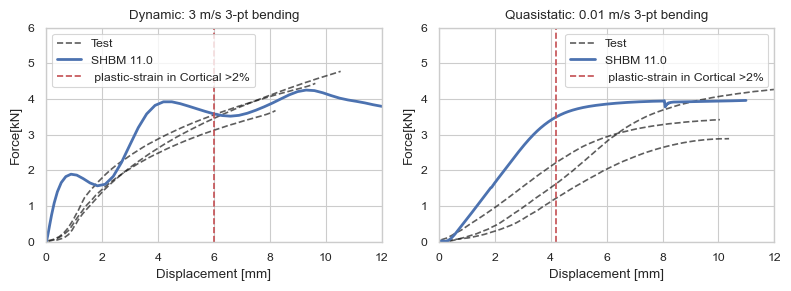

In [27]:
fig_fd, axs = plt.subplots(nrows=1, ncols=2,figsize=(8, 3))
axs[0].plot(pd.DataFrame(exp['high_speed'].d2) ,pd.DataFrame(exp['high_speed'].f2/1000),**pmhs,label='Test')
axs[0].plot(pd.DataFrame(exp['high_speed'].loc[:,'d3':'f4':2]) ,pd.DataFrame(exp['high_speed'].loc[:,'f3':'f4':2]/1000),**pmhs)
axs[0].plot(pd.DataFrame(sim_output['high_speed'].impactor.displacement.displacement)*-1,pd.DataFrame(sim_output['high_speed'].impactor.Force.force),**s11,label='SHBM 11.0')
axs[0].axvline (x=-sim_output['high_speed'].impactor.displacement.displacement.iloc[30][0],linestyle='--',color='r',label=" plastic-strain in Cortical >2%")
axs[0].set_title('Dynamic: 3 m/s 3-pt bending')
axs[0].set_xlim([0,12])
axs[0].set_ylim([0,6])
axs[0].set_ylabel('Force[kN]')
axs[0].set_xlabel('Displacement [mm]');
axs[0].legend()

axs[1].plot(pd.DataFrame(exp['low_speed'].d2) ,pd.DataFrame(exp['low_speed'].f2/1000),**pmhs,label='Test')
axs[1].plot(pd.DataFrame(exp['low_speed'].loc[:,'d3':'f4':2]) ,pd.DataFrame(exp['low_speed'].loc[:,'f3':'f4':2]/1000),**pmhs)
axs[1].plot(pd.DataFrame(sim_output['low_speed'].impactor.displacement.displacement)*-1,pd.DataFrame(sim_output['low_speed'].impactor.Force.force),**s11,label='SHBM 11.0')
axs[1].axvline (x=-sim_output[Tests[1]].impactor.displacement.displacement.iloc[420][0],linestyle='--',color='r',label=" plastic-strain in Cortical >2%")
axs[1].set_title('Quasistatic: 0.01 m/s 3-pt bending')
axs[1].set_xlim([0,12])
axs[1].set_ylim([0,6])
axs[1].set_ylabel('Force[kN]')
axs[1].set_xlabel('Displacement [mm]');
axs[1].legend()

# fig_fd.legend(bbox_to_anchor=(0.67, 0),ncol=2);
fig_fd.tight_layout()

### Energy plots

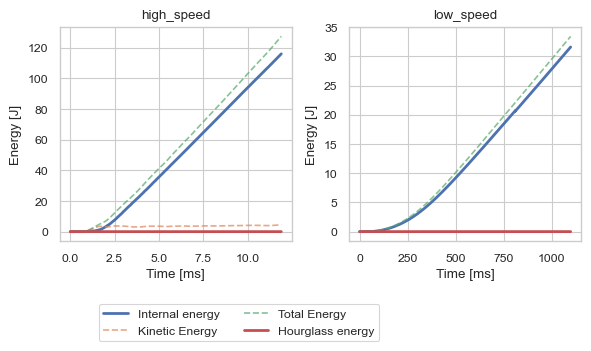

In [8]:
fig_fd, axs = plt.subplots(nrows=1, ncols=2,figsize=(6,3))
i=0
for ax in axs.flat:
    ax.plot(sim_output[Tests[i]].MODEL.Internal_Energy.time,sim_output[Tests[i]].MODEL.Internal_Energy.energy,linewidth=2)
    ax.plot(sim_output[Tests[i]].MODEL.Kinetic_Energy.time,sim_output[Tests[i]].MODEL.Kinetic_Energy.energy,linestyle='--',alpha=0.7)
    ax.plot(sim_output[Tests[i]].MODEL.Total_Energy.time,sim_output[Tests[i]].MODEL.Total_Energy.energy,linestyle='--',alpha=0.7)
    ax.plot(sim_output[Tests[i]].MODEL.Hourglass_Energy.time,sim_output[Tests[i]].MODEL.Hourglass_Energy.energy,linewidth=2)
    ax.set(title="{}".format(Tests[i]),xlabel='Time [ms]',ylabel='Energy [J]')
    i=i+1
fig_fd.legend(["Internal energy","Kinetic Energy","Total Energy","Hourglass energy"], bbox_to_anchor=(0.65,-0.01),ncol=2);
fig_fd.tight_layout()